<a href="https://colab.research.google.com/github/niuhaoyu16/nematodes_detection_using_walabot/blob/main/nematodes_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import io
import numpy as np
import pandas as pd
import matplotlib as mpl
%tensorflow_version 1.x
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

In [44]:
dataset= io.loadmat('levels.mat')
labels = io.loadmat('y.mat')
X = dataset['X']
y = labels['y'].astype(np.int32)-1

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
import tensorflow as tf
X_train.shape

(60, 2048)

In [ ]:
k_range = range(1,100,1)
models_per_k = []
for k in k_range:
  print("k={}".format(k))
  feature_cols = [tf.feature_column.numeric_column("X", shape=[64 * 32])]
  dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=4,
                                     feature_columns=feature_cols)

  input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=200, batch_size=10, shuffle=True)


  kmeans= dnn_clf.train(input_fn=input_fn)
  models_per_k.append(kmeans)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-02-08T20:32:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpffx68bpz/model.ckpt-1200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-02-08-20:32:47
INFO:tensorflow:Saving dict for global step 1200: accuracy = 0.8095238, average_loss = 0.96077967, global_step = 1200, loss = 20.176373
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1200: /tmp/tmpffx68bpz/model.ckpt-1200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-02-08T20:32:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx36u4cp7/model.ckpt-1200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-0

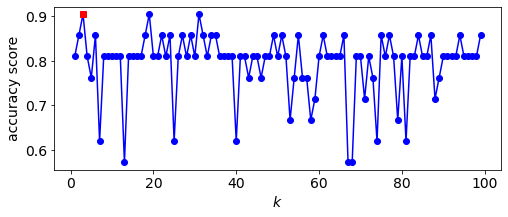

In [48]:

accuracy_scores = [model.evaluate(input_fn=test_input_fn)['accuracy']
                      for model in models_per_k]
best_index = np.argmax(accuracy_scores)
best_k = k_range[best_index]
best_score = accuracy_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, accuracy_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("accuracy score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [51]:

np.mean(accuracy_scores)

0.79461277